<a href="https://colab.research.google.com/github/Surichn/DSAI/blob/main/DS/TA/NLP/NLP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate \
      https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
      -o /tmp/headlines.json

In [3]:
import pandas as pd

data = pd.read_json("./x1.json")
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


Segregating Headlines 

In [5]:
headlines = list(data['headline'])

labels = list(data['is_sarcastic'])

Set the Parameters

In [6]:
vocab_size = 5000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

Splitting into Training and Testing

In [7]:
  training_sentences = headlines[0:training_size]
  testing_sentences = headlines[training_size:]

  training_labels = labels[0:training_size]
  testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_pad = pad_sequences(training_sequences,maxlen = max_length, padding=padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_pad = pad_sequences(testing_sequences,maxlen = max_length, padding=padding_type, truncating = trunc_type)

In [9]:
training_pad = np.array(training_pad)
training_labels = np.array(training_labels)
testing_pad = np.array(testing_pad)
testing_labels = np.array(testing_labels)

Define neural network with following layers


*   Embedding Layer
*   Replace the bidirectional LSTM Layers with convolution layer with a filter size of 5
*   GlobalAveragePooling Layer to down sample the feature ma;p
*   Dense Layer with 24 nodes
*   Output Dense Layer  with sigmoid activation

In [15]:
#model = tf.keras.Sequential([
#                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
#                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
#                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#                             tf.keras.layers.Dense(24,activation = 'relu'),
#                             tf.keras.layers.Dense(1,activation = 'sigmoid')
#])
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                             tf.keras.layers.Conv1D(64,5,activation='relu') ,
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           80000     
                                                                 
 conv1d (Conv1D)             (None, 116, 64)           5184      
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 86,769
Trainable params: 86,769
Non-trainable params: 0
__________________________________________________

Train the Model

In [16]:
num_epochs = 10

history = model.fit(
    training_pad,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_pad, testing_labels),
    verbose = 2
)

Epoch 1/10
625/625 - 5s - loss: 0.5128 - accuracy: 0.7291 - val_loss: 0.3780 - val_accuracy: 0.8326 - 5s/epoch - 8ms/step
Epoch 2/10
625/625 - 5s - loss: 0.3150 - accuracy: 0.8660 - val_loss: 0.3579 - val_accuracy: 0.8379 - 5s/epoch - 8ms/step
Epoch 3/10
625/625 - 5s - loss: 0.2630 - accuracy: 0.8907 - val_loss: 0.3659 - val_accuracy: 0.8378 - 5s/epoch - 8ms/step
Epoch 4/10
625/625 - 5s - loss: 0.2297 - accuracy: 0.9084 - val_loss: 0.3776 - val_accuracy: 0.8388 - 5s/epoch - 8ms/step
Epoch 5/10
625/625 - 5s - loss: 0.2055 - accuracy: 0.9189 - val_loss: 0.3945 - val_accuracy: 0.8372 - 5s/epoch - 8ms/step
Epoch 6/10
625/625 - 5s - loss: 0.1819 - accuracy: 0.9288 - val_loss: 0.4201 - val_accuracy: 0.8355 - 5s/epoch - 8ms/step
Epoch 7/10
625/625 - 5s - loss: 0.1583 - accuracy: 0.9412 - val_loss: 0.4478 - val_accuracy: 0.8349 - 5s/epoch - 9ms/step
Epoch 8/10
625/625 - 5s - loss: 0.1343 - accuracy: 0.9526 - val_loss: 0.4897 - val_accuracy: 0.8339 - 5s/epoch - 8ms/step
Epoch 9/10
625/625 - 5s 

Visualize the train and validation accuracy

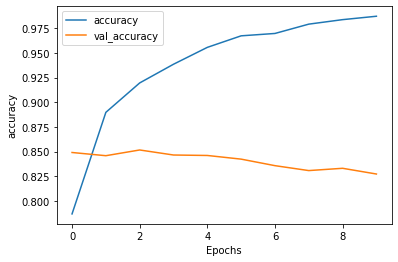

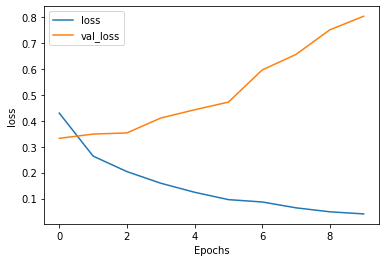

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_' +metric])
  plt.legend([metric, 'val_' +metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")


Classifying new/unseen sentence

In [17]:
sentence = ["the girl starting to fear snakes in the garden might be real", "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)
pad_seq = pad_sequences(sequences,maxlen = max_length,padding = padding_type, truncating = trunc_type)

print(model.predict(pad_seq))

[[0.06985372]
 [0.02646205]]
